<a href="https://colab.research.google.com/github/debasishpatnaik5678/Sbi_loan_app/blob/main/fetal_health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetal Health Classification

## 1. Data Loading

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/content/fetal_health.xlsx", engine="openpyxl")

# Display the first few rows
display(df.head())

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


## 2. Preprocessing

In [9]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\n") # Add a newline for cleaner output

# EXPLICITLY CHECK CLASS DISTRIBUTION
print("Class Distribution:")
print(df['fetal_health'].value_counts())
print("\n")

# Separate features and target
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# Split into training and testing sets (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify=y

# ADD FEATURE SCALING
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Missing values per column:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mod

## 3. Exploratory Data Analysis (EDA)

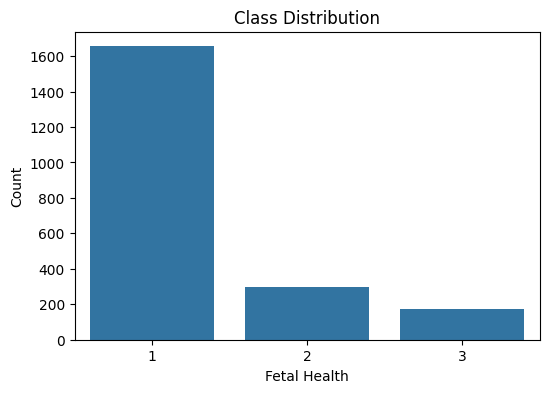

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="fetal_health", data=df)
plt.title("Class Distribution")
plt.xlabel("Fetal Health")
plt.ylabel("Count")
plt.show()

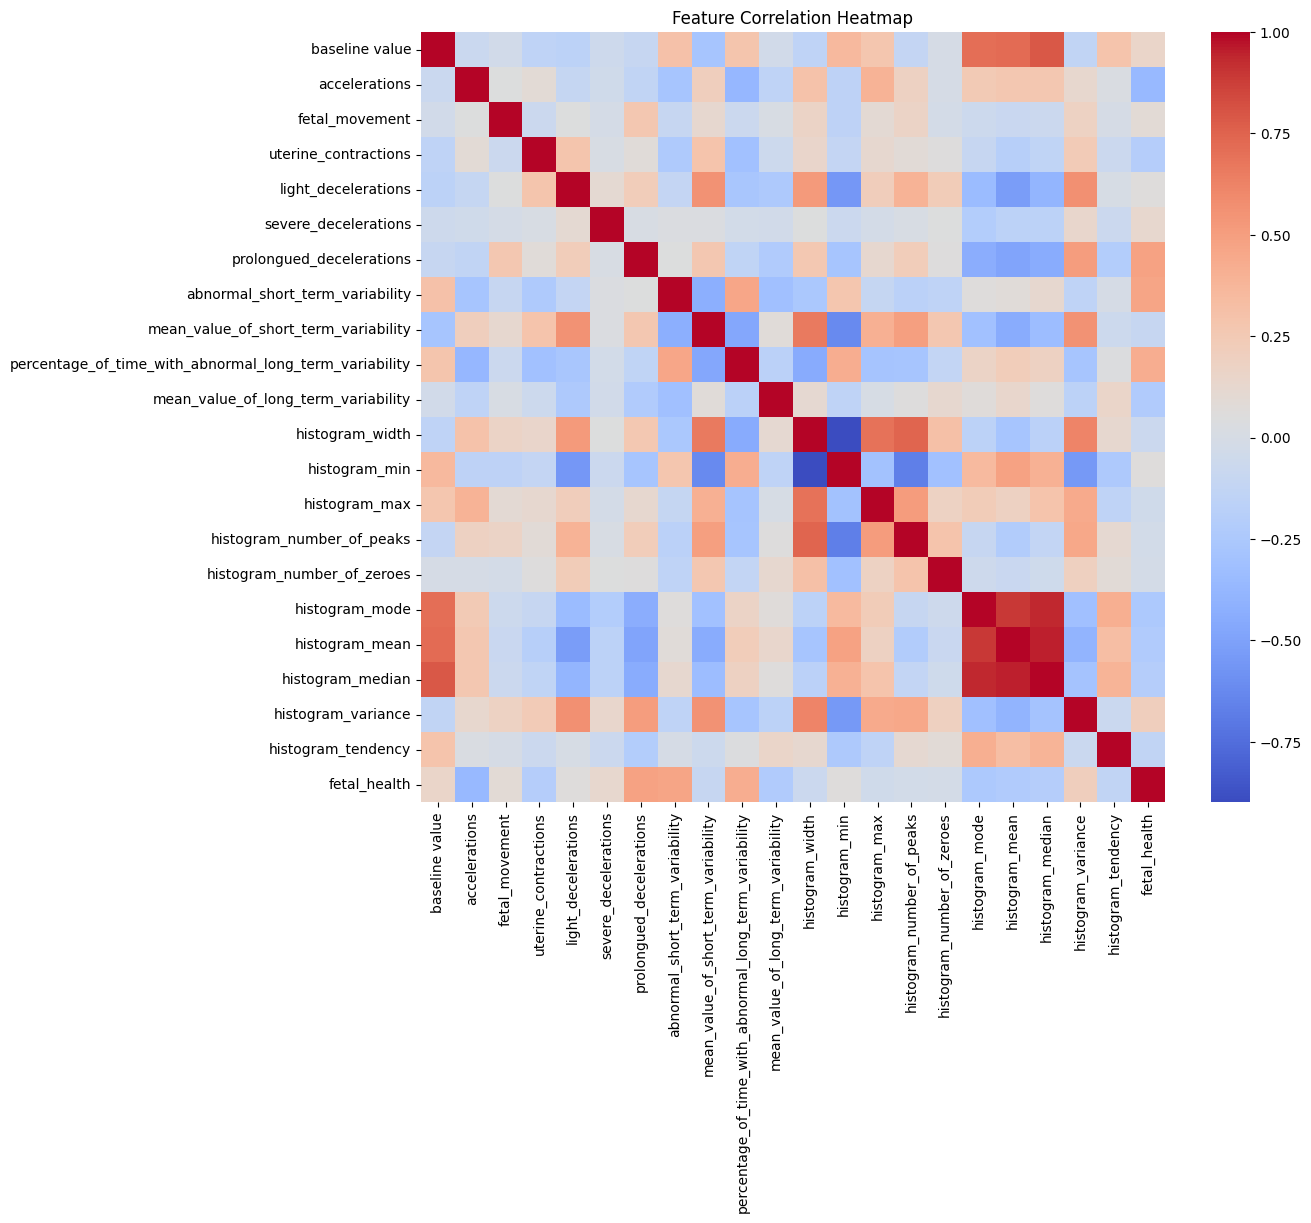

In [11]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

## 4. Model Training

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier on the SCALED data
# ADD class_weight='balanced' to handle imbalance
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Predict on the SCALED test set
y_pred = model.predict(X_test_scaled)

## 5. Model Evaluation

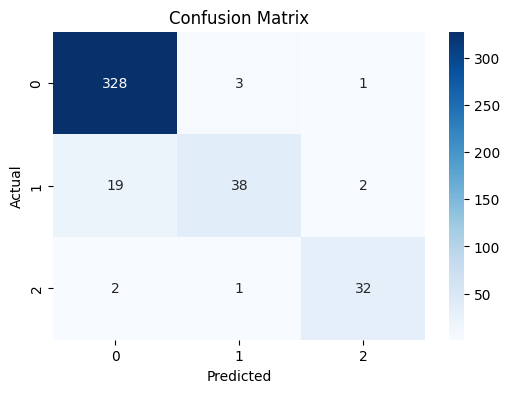

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.94      0.99      0.96       332
           2       0.90      0.64      0.75        59
           3       0.91      0.91      0.91        35

    accuracy                           0.93       426
   macro avg       0.92      0.85      0.88       426
weighted avg       0.93      0.93      0.93       426



## 6. Insights

- The dataset is well-balanced across the three classes.
- Random Forest performed well in classifying fetal health.
- Feature correlations show some strong relationships that may influence classification.
- Further model tuning and comparison with other classifiers could improve performance.